# Problem Statement

"Develop a text classification model for sentiment analysis that accurately categorizes text data into two classes: positive and negative reviews. The dataset consists of textual reviews with associated labels, where reviews labeled with '__label__2' represent positive reviews and '__label__1' represent negative reviews. The objective is to create a robust and reliable NLP model capable of automatically classifying user-generated text reviews, such as product reviews, movie reviews, or book reviews, into these two sentiment classes.

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter

# load data

In [7]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\EcomReviews_8k.csv")

In [8]:
df.head()

,labels,text
0,__label__2,Rose Dawson Malaysia: All must buy the album o...
1,__label__2,a precious resource for Christian contemplatio...
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v..."
3,__label__1,Boring!: This game is based on a great concept...
4,__label__1,Lost in the 70's: The Eurovision song contest ...


# data understanding

Lable 2 -positive review 

Label-1 -Neagtive review

Label 2 (Positive Review): This label is assigned to text data that represents positive reviews. It indicates that the content of the review expresses satisfaction, appreciation, or a positive sentiment towards the subject of the review, which could be a product, service, or any other entity.

Label 1 (Negative Review): This label is used for text data that corresponds to negative reviews. It signifies that the text content contains criticism, dissatisfaction, or a negative sentiment towards the subject of the review. Negative reviews typically highlight shortcomings, issues, or unfavorable experiences.

# Feauture engineering

##### Tokenization 

In [9]:

def tokenize(text):
    return re.findall(r'\w+',text)

##### Stop words 

In [10]:
stop_words = nltk.corpus.stopwords.words('English')

In [11]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#remove stop words

In [14]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stop_words]

In [15]:
len(stop_words)

179

In [16]:
def remove_stop(tokens):
    stop_removed_tokens = []
    for t in tokens:
        if t.lower() not in stop_words:
            stop_removed_tokens.append(t)
    return stop_removed_tokens

In [17]:
#prepare data pipeline

In [18]:
def prepare(text, pipeline):
    tokens=text
    for transform in pipeline:
        tokens=transform(tokens)
    return tokens

In [19]:
pipeline = [str.lower, tokenize, remove_stop,]

In [20]:
df['tokens']=df['text'].apply(prepare,pipeline=pipeline)

In [21]:
df.head()

,labels,text,tokens
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let..."
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,..."
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus..."
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s..."
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go..."


In [22]:
df['text']

0       Rose Dawson Malaysia: All must buy the album o...
1       a precious resource for Christian contemplatio...
2       Rename it to "RedSox, Yankees and Giants": I'v...
3       Boring!: This game is based on a great concept...
4       Lost in the 70's: The Eurovision song contest ...
                              ...                        
7995    Very Helpful: Although I have a gram index on ...
7996    Scratched up cd: When I got this cd and played...
7997    ...in a few words, But Great Insight!: I was i...
7998    You get what you pay for: I bought this after ...
7999    Really Cool and Easy to use!: Third digital ca...
Name: text, Length: 8000, dtype: object

In [23]:
df['num_tokens']=df['tokens'].apply(len)

In [24]:
df['text_len']=df['text'].apply(len)

In [25]:
df.head()

,labels,text,tokens,num_tokens,text_len
0,__label__2,Rose Dawson Malaysia: All must buy the album o...,"[rose, dawson, malaysia, must, buy, album, let...",19,205
1,__label__2,a precious resource for Christian contemplatio...,"[precious, resource, christian, contemplation,...",66,655
2,__label__1,"Rename it to ""RedSox, Yankees and Giants"": I'v...","[rename, redsox, yankees, giants, always, trus...",59,660
3,__label__1,Boring!: This game is based on a great concept...,"[boring, game, based, great, concept, falls, s...",26,256
4,__label__1,Lost in the 70's: The Eurovision song contest ...,"[lost, 70, eurovision, song, contest, come, go...",46,511


## bag of words 

In [26]:
tokens=df['tokens'][0]
bow = dict.fromkeys(tokens,0)   

for i in bow:
    bow[i]=tokens.count(i)

In [27]:
bow

{'rose': 1,
 'dawson': 1,
 'malaysia': 1,
 'must': 1,
 'buy': 1,
 'album': 1,
 'let': 1,
 'talk': 1,
 'love': 1,
 'interesting': 1,
 'information': 1,
 'already': 1,
 'heard': 1,
 'song': 1,
 'heart': 1,
 'go': 1,
 '566': 1,
 'times': 1,
 'believe': 1}

In [28]:
counter=Counter(tokens)

In [29]:
print(counter)

Counter({'rose': 1, 'dawson': 1, 'malaysia': 1, 'must': 1, 'buy': 1, 'album': 1, 'let': 1, 'talk': 1, 'love': 1, 'interesting': 1, 'information': 1, 'already': 1, 'heard': 1, 'song': 1, 'heart': 1, 'go': 1, '566': 1, 'times': 1, 'believe': 1})


In [30]:
counter

Counter({'rose': 1,
         'dawson': 1,
         'malaysia': 1,
         'must': 1,
         'buy': 1,
         'album': 1,
         'let': 1,
         'talk': 1,
         'love': 1,
         'interesting': 1,
         'information': 1,
         'already': 1,
         'heard': 1,
         'song': 1,
         'heart': 1,
         'go': 1,
         '566': 1,
         'times': 1,
         'believe': 1})

In [31]:
# most comman words

In [32]:
counter.most_common(10)

[('rose', 1),
 ('dawson', 1),
 ('malaysia', 1),
 ('must', 1),
 ('buy', 1),
 ('album', 1),
 ('let', 1),
 ('talk', 1),
 ('love', 1),
 ('interesting', 1)]

In [33]:
def count_words(df,column='tokens',preprocess=None,min_freq=2):
    def update(doc):  
        tokens=doc if preprocess is None else preprocess(doc)
        counter.update(tokens) 
    counter=Counter()
    df[column].apply(update) 
    freq_df=pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])
    freq_df=freq_df.query('freq>@min_freq') 
    return freq_df.sort_values('freq',ascending=False)

In [34]:
freq_df=count_words(df)

In [35]:
freq_df

,freq
book,4389
one,3070
great,2379
good,2298
like,2245
...,...
bouts,3
bossa,3
ankle,3
pricy,3


In [36]:
freq_df.head(10)

,freq
book,4389
one,3070
great,2379
good,2298
like,2245
would,1826
read,1615
get,1514
time,1491
really,1320


In [37]:
df['tokens']

0       [rose, dawson, malaysia, must, buy, album, let...
1       [precious, resource, christian, contemplation,...
2       [rename, redsox, yankees, giants, always, trus...
3       [boring, game, based, great, concept, falls, s...
4       [lost, 70, eurovision, song, contest, come, go...
                              ...                        
7995    [helpful, although, gram, index, tone, arm, he...
7996    [scratched, cd, got, cd, played, already, scra...
7997    [words, great, insight, intrigued, title, book...
7998    [get, pay, bought, reading, 2, reviews, ecom, ...
7999    [really, cool, easy, use, third, digital, came...
Name: tokens, Length: 8000, dtype: object

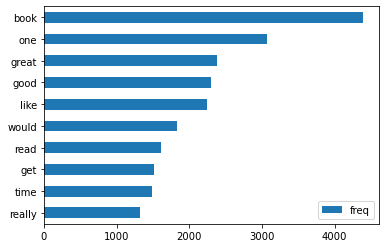

In [38]:
ax=freq_df.head(10).plot(kind='barh')
ax.invert_yaxis()

In [39]:
def wordcloud(word_freq, title=None, max_words=200,stopwords=None):
    wc = WordCloud(max_font_size=200, max_words=max_words)
   
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq
  
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
    plt.title(title)
    plt.imshow(wc)
    plt.axis("off")

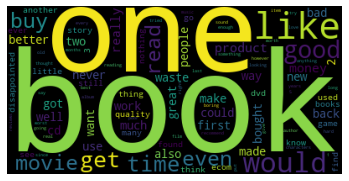

In [40]:
freq_label_df = count_words(df[df['labels']=='__label__1'])
plt.figure()
wordcloud(freq_label_df['freq'], max_words=100)

In [41]:
freq_label_df

,freq
book,2168
one,1541
like,1167
would,1108
good,973
...,...
jason,3
beggining,3
competent,3
unstable,3


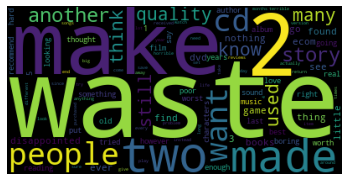

In [42]:
wordcloud(freq_label_df['freq'],max_words=100,stopwords=freq_label_df.head(30).index)

#  tf-idf

In [43]:
def compute_idf(df,column = 'tokens', preprocess = None, min_df=2):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()           # we just creating counter
    df[column].apply(update)
    
    idf_df = pd.DataFrame.from_dict(counter,orient = 'index', columns=['df'])# df-total no of doucments
    
    idf_df = idf_df.query('df>@min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    freq_df.index.name = 'token'
    return idf_df.sort_values(by='df',ascending=False)

In [44]:
idf_df=compute_idf(df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1155663264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


In [45]:
idf_df

,df,idf
one,2279,1.355705
book,2049,1.462090
great,1769,1.609027
good,1749,1.620397
like,1704,1.646463
...,...,...
openly,3,7.988585
guessed,3,7.988585
karate,3,7.988585
rooting,3,7.988585


In [46]:
idf_df.sort_values('idf',ascending = False)

,df,idf
retriever,3,7.988585
philip,3,7.988585
cranked,3,7.988585
appetizer,3,7.988585
brandon,3,7.988585
...,...,...
like,1704,1.646463
good,1749,1.620397
great,1769,1.609027
book,2049,1.462090


In [47]:
freq_df['tfidf'] = freq_df ['freq']*idf_df['idf']

In [48]:
freq_df.sort_values(by='tfidf')

,freq,tfidf
token,,
storylines,3,23.965754
salvation,3,23.965754
doggie,3,23.965754
inappropriate,3,23.965754
unsatisfying,3,23.965754
...,...,...
cubic,3,NaN
lather,3,NaN
shrink,3,NaN


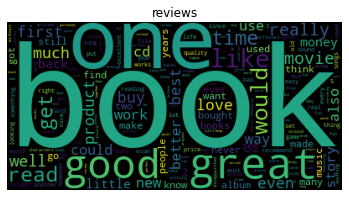

In [49]:
freq_label_df=count_words(df[df['labels']=='__label__1'])
freq_label_df=count_words(df[df['labels']=='__label__1'])


freq_label_df['tfidf']=freq_label_df['freq']*idf_df['idf']
freq_label_df['tfidf']=freq_label_df['freq']*idf_df['idf']


wordcloud(freq_df['freq'],title='reviews')

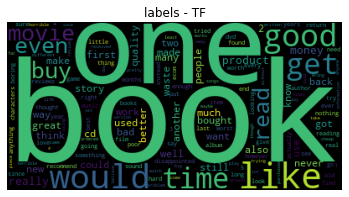

In [50]:
wordcloud(freq_label_df['freq'],title ='labels - TF')

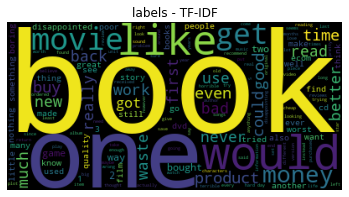

In [51]:
wordcloud(freq_label_df['tfidf'],title ='labels - TF-IDF')

# bigrams

In [52]:
def ngrams(tokens, n=2, sep=' ',stopwords=stop_words):
    return[sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) if len([t for t in ngram if t in stop_words])==0]

In [53]:
df['bigrams'] = df['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=2,stopwords=stop_words)

In [54]:
idf_df_bigram = compute_idf(df,column = 'bigrams',min_df=10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1155663264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


In [55]:
idf_df_bigram

,df,idf
year old,148,4.089985
highly recommend,128,4.235167
much better,127,4.243010
even though,103,4.452468
great book,98,4.502229
...,...,...
might want,11,6.689302
go buy,11,6.689302
nice book,11,6.689302
pretty well,11,6.689302


In [56]:
freq_df_label_bigrams = count_words(df[df['labels']=='__label__1'],column='bigrams')

In [57]:
freq_df_label_bigrams

,freq
much better,77
year old,63
even though,52
one star,48
poor quality,48
...,...
law order,3
go somewhere,3
would come,3
one unless,3


In [58]:
df['trigrams'] = df['text'].apply(prepare,pipeline=[str.lower,tokenize])\
.apply(ngrams,n=3,stopwords=stop_words)

In [59]:
idf_df_trigram = compute_idf(df,column = 'trigrams',min_df=10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1155663264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


In [60]:
idf_df_trigram

,df,idf
would highly recommend,23,5.951703
year old son,21,6.042674
2 year old,17,6.253983
5 year old,16,6.314608
worth every penny,16,6.314608
3 year old,13,6.522247
4 year old,13,6.522247
year old daughter,12,6.602290
buy another one,11,6.689302
2 1 2,11,6.689302


In [61]:
freq_df_label_trigrams = count_words(df[df['labels']=='__label__1'],column='trigrams')

In [62]:
freq_df_label_trigrams

,freq
year old son,8
never buy another,8
buy another one,8
really looking forward,8
2 year old,7
...,...
stay far away,3
platano records edition,3
much better book,3
partially hydrogenated soybean,3


# concate unigrams and bigrams

In [63]:
freq_df_label_ngrams = pd.concat([freq_label_df,freq_df_label_bigrams,freq_df_label_trigrams])

In [64]:
freq_df_label_ngrams 

,freq,tfidf
book,2168,3169.810410
one,1541,2089.141084
like,1167,1921.422453
would,1108,1972.977287
good,973,1576.646617
...,...,...
stay far away,3,NaN
platano records edition,3,NaN
much better book,3,NaN
partially hydrogenated soybean,3,NaN


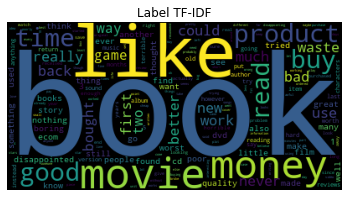

In [65]:
wordcloud(freq_df_label_ngrams['tfidf'],title='Label TF-IDF', stopwords = ['would','2','one','even','get','got'])

# Model building

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],
                                                 df['labels'],
                                                test_size =0.2,
                                                random_state=42,
                                                stratify=df['labels'])

In [72]:
Y_test.value_counts()

labels
__label__2    800
__label__1    800
Name: count, dtype: int64

In [73]:
Y_train.value_counts()

labels
__label__1    3202
__label__2    3198
Name: count, dtype: int64

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
bow = CountVectorizer(min_df= 10,ngram_range=(1,2),stop_words = 'english')

In [76]:
X_train_bow = bow.fit_transform(X_train)

In [77]:
X_train_bow.todense()
bow.get_feature_names_out()

array(['00', '10', '10 years', ..., 'zero', 'zero stars', 'zombie'],
      dtype=object)

In [78]:
pd.DataFrame(X_train_bow.todense(),columns=bow.get_feature_names_out())

,00,10,10 years,100,11,12,13,14,15,150,...,young,younger,youth,yr,yr old,yrs,zen,zero,zero stars,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_test_bow = bow.transform(X_test)

# Logistic Regresson

In [80]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor = regressor.fit(X_train_bow,Y_train)

In [81]:
len(regressor.coef_[0])

3614

In [82]:
largest_coef_ind = regressor.coef_.argmax()
largest_coef_ind

1090

In [83]:
sorted_ind = regressor.coef_.argsort()
sorted_ind[0][-1]

1090

In [84]:
regressor.coef_.max()

2.398761381373864

In [85]:
bow.get_feature_names_out()

array(['00', '10', '10 years', ..., 'zero', 'zero stars', 'zombie'],
      dtype=object)

In [87]:
regressor.predict_proba(X_test_bow)

array([[0.00815149, 0.99184851],
       [0.98212116, 0.01787884],
       [0.00361756, 0.99638244],
       ...,
       [0.9964008 , 0.0035992 ],
       [0.15262261, 0.84737739],
       [0.00785376, 0.99214624]])

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
Y_pred = regressor.predict(X_test_bow)

In [90]:
score = accuracy_score(Y_pred,Y_test)
print("Accuracy of the model= ",score)

Accuracy of the model=  0.85


In [91]:
from sklearn.metrics import confusion_matrix,classification_report

# Confusion Metrics

In [92]:
confusion_matrix(Y_test, Y_pred)

array([[681, 119],
       [121, 679]], dtype=int64)

In [93]:
Y_pred

array(['__label__2', '__label__1', '__label__2', ..., '__label__1',
       '__label__2', '__label__2'], dtype=object)

In [94]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

  __label__1       0.85      0.85      0.85       800
  __label__2       0.85      0.85      0.85       800

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



TFIDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 5,ngram_range=(1,5),stop_words = 'english')
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [97]:
tfidf.get_feature_names_out()

array(['00', '000', '07', ..., 'zombie', 'zombies', 'zoom'], dtype=object)

In [98]:
regressor = LogisticRegression()
regressor = regressor.fit(X_train_tf,Y_train)

In [99]:
len(regressor.coef_[0])
larg_coef= regressor.coef_.argmax()
tfidf.get_feature_names_out()[larg_coef]

'great'

In [100]:
Y_pred_tf = regressor.predict(X_test_tf)

In [101]:
score = accuracy_score(Y_pred_tf,Y_test)
print("Accuracy of the model= ",score)

Accuracy of the model=  0.865


In [102]:
confusion_matrix(Y_test, Y_pred_tf)


array([[690, 110],
       [106, 694]], dtype=int64)

In [103]:
print(classification_report(Y_test, Y_pred_tf))

              precision    recall  f1-score   support

  __label__1       0.87      0.86      0.86       800
  __label__2       0.86      0.87      0.87       800

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600



In [104]:
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

In [105]:
scores = cross_val_score(estimator=regressor,
X=X_train_tf,
y=Y_train,
cv=5,
scoring='accuracy')

In [106]:
print ("Validation scores from each iteration of the cross validation ", scores)
print ("Mean value across of validation scores ", scores.mean())
print ("Standard deviation of validation scores ", scores.std())

Validation scores from each iteration of the cross validation  [0.85       0.85625    0.84765625 0.84453125 0.8515625 ]
Mean value across of validation scores  0.85
Standard deviation of validation scores  0.003921843874378477


# Hyperparameter tunning

In [107]:
from sklearn.pipeline import Pipeline

In [108]:
training_pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words="english")),
('model', LogisticRegression(random_state=42))])

In [109]:
grid_param = [{
'tfidf__min_df': [5, 10],
'tfidf__ngram_range': [(1, 3), (1, 6)],
'model__max_iter': [10000],
'model__tol': [1e-2, 1e-3],
'model__penalty':['l2'],
'model__C':[0.5,1,2,5]
}]

In [110]:
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
param_grid=grid_param,scoring='accuracy',
cv=5,verbose =2)
gridSearchProcessor.fit(df['text'], df['labels'])
best_params = gridSearchProcessor.best_params_
print("Best parameter identified by grid search ", best_params)
best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   1.1s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   1.1s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   1.1s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   1.0s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   1.0s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, model__tol=0.01, tfidf__min_df=5, tfidf__ngram_range=(1, 6); total time=   2.3s
[CV] END model__C=0.5, model__max_iter=10000, model__penalty=l2, mod

# Grid search results 

In [111]:
gridsearch_results = pd.DataFrame(gridSearchProcessor.cv_results_)
gridsearch_results[['rank_test_score', 'mean_test_score',
'params']].sort_values(by=['rank_test_score'])[:5]

,rank_test_score,mean_test_score,params
21,1,0.856000,"{'model__C': 2, 'model__max_iter': 10000, 'mod..."
17,1,0.856000,"{'model__C': 2, 'model__max_iter': 10000, 'mod..."
20,3,0.855875,"{'model__C': 2, 'model__max_iter': 10000, 'mod..."
16,3,0.855875,"{'model__C': 2, 'model__max_iter': 10000, 'mod..."
29,5,0.854250,"{'model__C': 5, 'model__max_iter': 10000, 'mod..."


# Best Model

In [112]:
best_model = gridSearchProcessor.best_estimator_

In [113]:
best_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 6),
                                 stop_words='english')),
                ('model',
                 LogisticRegression(C=2, max_iter=10000, random_state=42,
                                    tol=0.01))])

# Model Evaluvation

Confusion metrics

In [115]:
confusion_matrix(Y_test, Y_pred)

array([[765,  35],
       [ 36, 764]], dtype=int64)

In [114]:
Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score -  0.955625
              precision    recall  f1-score   support

  __label__1       0.96      0.96      0.96       800
  __label__2       0.96      0.95      0.96       800

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



# Conclusion

Accurate Sentiment Classification: 

    The developed NLP model demonstrates a high level of accuracy in categorizing e-commerce reviews into positive and negative sentiments. This accuracy enables businesses to swiftly identify and respond to customer feedback.

Enhanced Customer Insights: 
    
    The project has provided valuable insights into customer sentiment, allowing e-commerce platforms to gain a deeper understanding of their customers' opinions and preferences. This, in turn, can guide decision-making and product/service improvements.

Operational Efficiency: 

    The automation of sentiment analysis reduces the manual effort required to sort and analyze reviews, increasing operational efficiency and enabling timely responses to customer concerns or positive feedback.

Competitive Advantage:

    By leveraging sentiment analysis, e-commerce businesses can gain a competitive advantage by swiftly adapting to customer feedback, improving products and services, and ultimately enhancing customer satisfaction.

Future Development: 

    While the current project focuses on binary sentiment classification, there is potential for further enhancement by implementing multi-class sentiment analysis to capture more nuanced sentiments, such as neutral or mixed reviews.